In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%run load_data.py

/home/zhampel/py-venv/python3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# Load an image and get its label
img_id = 10
#head_dir='/Users/zhampel/insight/project/data/mnist/pngs'
head_dir='/home/zhampel/insight/data/mnist/pngs'
filepath=head_dir+'/training/'
img, label = load_img(path_to_data=filepath, img_id=img_id, file_type='png')
print(img.shape)

(28, 28)


0.0 0.99607843
3


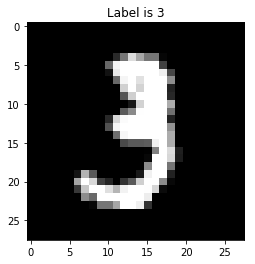

In [4]:
# Display the image
print(np.min(img), np.max(img))
print(label)
plt.title('Label is {label}'.format(label=label))
plt.imshow(img, cmap='gray')
plt.show()

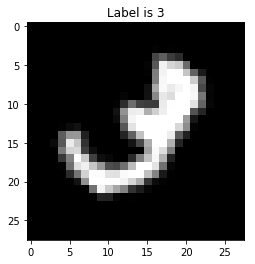

In [5]:
# Rotate the image and display
rot_img = rotate_image(img, 35.)
plt.title('Label is {label}'.format(label=label))
plt.imshow(rot_img, cmap='gray')
plt.show()

In [6]:
%run plots.py

<Figure size 432x288 with 0 Axes>

/home/zhampel/py-venv/python3/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


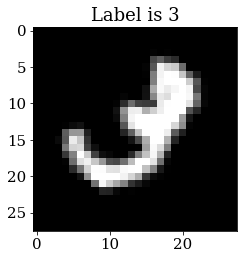

In [7]:
plot_image(rot_img, cmap='gray', label=label)